## Taller 2b: Detección de anomalías con Isolation Forest



In [1]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline

random_state = 1234

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e' -O creditcard.pkl

--2023-10-27 13:48:40--  https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e
Resolving docs.google.com (docs.google.com)... 173.194.69.138, 173.194.69.101, 173.194.69.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1kuml8vra8nn44a2cfc96ach1ng3ntjm/1698414525000/02109188480849179502/*/1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e?e=download&uuid=6c1e83a9-cbea-4fe7-982d-f7dc578d6106 [following]
--2023-10-27 13:48:46--  https://doc-10-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1kuml8vra8nn44a2cfc96ach1ng3ntjm/1698414525000/02109188480849179502/*/1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e?e=download&uuid=6c1e83a9-cbea-4fe7-982d-f7dc578d6106
Resolving doc-10-bk-docs.googleusercontent.com (doc-10-bk-docs.googleusercontent.com)... 172.217.218.132, 2a00:1450

In [3]:
#Cargamos los datos
df = pd.read_pickle('creditcard.pkl')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


<Axes: >

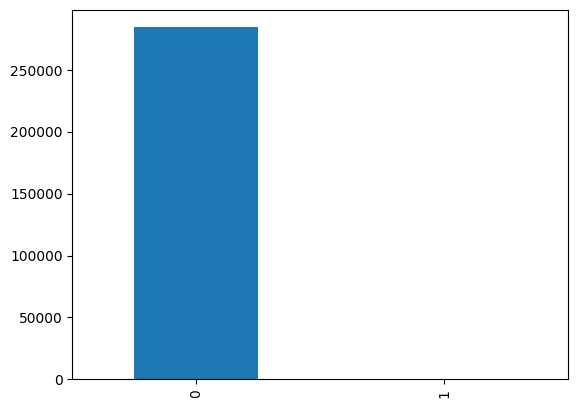

In [4]:
#Exploramos la variable objetivo
print(df.Class.value_counts())
df.Class.value_counts().plot(kind='bar')

In [5]:
# Separemos nuestros datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='Class'),
    df['Class'],
    test_size=0.2,
    stratify=df['Class'],
    random_state=random_state
)

In [6]:
#Entrenaremos un classificador RandomForest para resolver este problema
rf_base = RandomForestClassifier(random_state=random_state)

pipeline_rf = Pipeline(steps = [
        ('classifier', rf_base),
                            ])

# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [1, 10, 50]
}

# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(pipeline_rf, param_grid=param_grid)

In [7]:
# Entrenemos el random forest:
rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=1234))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 10, 50],
                         'classifier__n_estimators': [50, 100]})

In [8]:
rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 50}

In [9]:
# Obtengamos la accuracy y el F1 score de entrenamiento
print("Training set")
print(f'Accuracy: {rf.score(X_train, y_train)}')
print(f"F1 score: {f1_score(y_train, rf.predict(X_train), average='macro')}")
print('\n')

Training set
Accuracy: 0.9996576620070662
F1 score: 0.9452924324533583




In [10]:
# Obtengamos la accuracy y el F1 score de prueba para cada modelo:
print("Test set")
print(f'Accuracy: {rf.score(X_test, y_test)}')
print(f"F1 score: {f1_score(y_test, rf.predict(X_test), average='macro')}")
print('\n')

Test set
Accuracy: 0.9995962220427653
F1 score: 0.9363629832748375




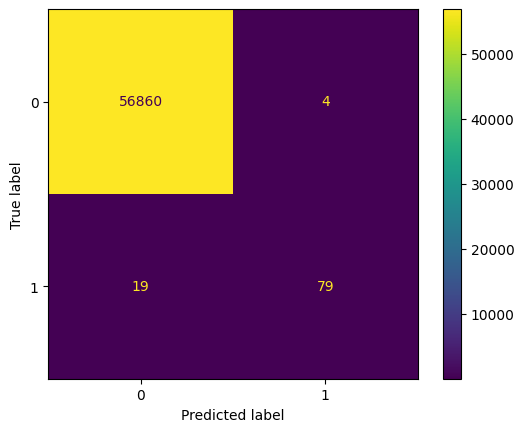

In [11]:
# Grafiquemos la matriz de confusión del random foresr para los datos de prueba (sin normalizar):
cm = confusion_matrix(y_test,rf.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [12]:
#Ahora, entrenemos un modelo basado en Isolation Forest
#Tip: Isolation forest de sklearn devuelve -1 para outliers y 1 para inliers.
#Por esta razón, se deben mapear los -1 devueltos por el modelo para poder calcular
#las métricas de validación que se utilizan

# Create an Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=random_state)

# Fit the Isolation Forest model on the training data
iso_forest.fit(X_train)

# Predict outliers (-1) and inliers (1) on the test data
y_pred = iso_forest.predict(X_test)

# Map -1 to 0 for outliers and 1 to 1 for inliers to match the class labels
y_pred_mapped = [0 if label == -1 else 1 for label in y_pred]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [13]:
#Calcular el accuracy y F1 score de Isolation forest en los conjuntos de entrenamiento y test

# Predict outliers (-1) and inliers (1) on the training data
y_train_pred = iso_forest.predict(X_train)

# Map -1 to 0 for outliers and 1 to 1 for inliers in training predictions
y_train_pred_mapped = [0 if label == -1 else 1 for label in y_train_pred]

# Calculate accuracy and F1 score on the training set
train_accuracy = accuracy_score(y_train, y_train_pred_mapped)
train_f1_score = f1_score(y_train, y_train_pred_mapped)

print("Training set")
print(f'Accuracy: {train_accuracy}')
print(f"F1 score: {train_f1_score}")

# Calculate accuracy and F1 score on the test set (already done in the previous code)
print("Test set")
print(f'Accuracy: {accuracy_score(y_test, y_pred_mapped)}')
print(f"F1 score: {f1_score(y_test, y_pred_mapped)}")


Training set
Accuracy: 0.009563519059009415
F1 score: 0.0013011152416356876
Test set
Accuracy: 0.00925178188968084
F1 score: 0.0013448709100883013


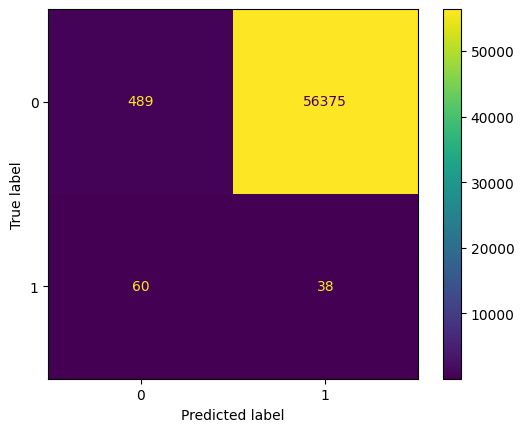

In [14]:
#Graficar la matriz de confusión para Isolation forest

cm = confusion_matrix(y_test, y_pred_mapped)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define los hiperparámetros que deseas buscar
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.1, 0.2, 0.3],
    'max_features': [0.5, 0.7, 1.0]
}


# Crea el modelo Isolation Forest
iso_forest = IsolationForest(random_state=random_state)

# Realiza una búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(iso_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusta el modelo a tus datos de entrenamiento
grid_search.fit(X_train)

# Encuentra los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crea un modelo Isolation Forest con los mejores hiperparámetros
best_iso_forest = IsolationForest(
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    max_features=best_params['max_features'],
    random_state=random_state
)

# Ajusta el mejor modelo a tus datos de entrenamiento
best_iso_forest.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores hiperparámetros: {'max_features': 0.5, 'max_samples': 0.1, 'n_estimators': 50}


IsolationForest(max_features=0.5, max_samples=0.1, n_estimators=50,
                random_state=1234)

In [17]:

# Predice los valores en el conjunto de prueba
y_pred = best_iso_forest.predict(X_test)

# Mapea -1 a 0 para outliers y 1 a 1 para inliers
y_pred_mapped = [0 if label == -1 else 1 for label in y_pred]

# Calcula la métrica de accuracy
accuracy = accuracy_score(y_test, y_pred_mapped)

# Calcula la métrica de F1-score
f1 = f1_score(y_test, y_pred_mapped)

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test, y_pred_mapped)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.004266001896000842
F1 Score: 0.0015139512366869115
Confusion Matrix:
[[  200 56664]
 [   55    43]]
